In [ ]:
"""
Şimdi bir onceki 7 asamali ornegin  üzerinde duralım. Daha önceden de belirttiğimiz gibi pek çok problem iki saklı 
katmanla ve Dense bir bağlantı ile tatminkar biçimde çözülebilmektedir. Dolayısıyla bizim ilk aklımıza gelen model iki saklı 
katmanlı klasik modeldir. Ancak özel problemler (şekil tanıma, yazıdan anlam çıkartma, görüntü hakkında çıkarım yapma gibi) 
iki saklı katmanla tatminkar biçimde çözülememketedir. Bu durumda ikiden fazla saklı katman kullanılır. Bu modellere "derin 
öğrenme (deep learning)" modelleri de denilmektedir. 

Girdi katmanındaki nöron sayısı zaten problemdeki sütun sayısı kadar (özellik sayısı kadar) olmalıdır. Tabii kategorik sütunlar 
"one-hot encoding" işlemine sokulmalıdır. Çıktı katmanındaki nöron sayıları ise yine probleme bağlıdır. İkili sınıflandırma 
(binary classification) problemlerinde çıktı katmanı tek nörondan, çoklu sınıflandırma problemlerinde (multiclass classification) 
çıktı katmanı sınıf sayısı kadar nörondan oluşur. Regresyon problemlerinde ise çıktı katmanındaki nöron 
sayıları genellikle bir tane olmaktadır.

Saklı katmanlardaki nöron sayıları için çok pratik şeyler söylemek zordur. Çünkü saklı katmanlardaki nöron sayıları bazı 
faktörlere de bağlı olarak ayarlanabilmektedir. Örneğin eğitimde kullanılacak veri miktarı, problemin karmaşıklığı, hyper 
parametrelerin durumları saklı katmanlardaki nöron sayıları üzerinde etkili olabilmektedir. Saklı katmanlardaki nöron sayıları 
için şunlar söylenebilir:

- Problem karmaşıklaştıkça saklı katmanlardaki nöron sayılarını artırmak uygun olabilmektedir. 
- Saklı katmanlarda çok az nöron bulundurmak "underfitting" yani yetersiz öğrenmeye yol açabilmektedir. 
- Saklı katmanlarda gereksiz biçimde fazla sayıda nöron bulundurmak eğitim süresini uzatabileceği gibi "overfitting" durumuna 
da yol açabilir. Aynı zamanda modelin diskte saklanması için gereken disk alanını da artırabilmektedir.
- Eğitim veri kümesi azsa saklı katmanlardaki nöron sayıları düşürülebilir. 
- Pek çok problemde saklı katmanlardaki nöron sayıları çok fazla ya da çok az olmadıktan sonra önemli olmayabilir. 
- Saklı katmanlardaki nöron sayısı girdi katmanındaki nöron sayısından az olmamlıdır. 

Çeşitli kaynaklar saklı katmanlardaki nöronların sayıları için üstünkörü şu pratik tavsiyelerde bulunmaktadır:

- Saklı katmanlardaki nöronların sayıları girdi katmanındaki nöronların sayılarının 2/3'ü ile çıktı katmanındaki nöronların 
sayısının toplamı kadar olabilir. Örneğin girdi katmanındaki nöron sayısı 5, çıktı katmanındaki 1 olsun. Bu durumda saklı 
katmandaki nöron sayısı 4 ya da 5 olabilir. 

- Saklı katmandaki nöronların sayısı girdi katmanındaki nöron sayısının iki katından fazla olmamalıdır.

Biz genellikle genel problemlerde iki saklı katman ve katmalarda da 16, 32, 64, 100, 128 gibi sayılarda nöron kullanacağız. 
Ancak ileride özel mimarilerde bu durumu farklılaştıracağız.
"""

In [ ]:
"""
Yapay sinir ağı her farklı eğitimde farklı "w" ve "bias" değerlerini oluşturabilir. Bu nedenle ağın peformans değerleri de 
eğitimden eğitime değişebilir. Her eğitimde ağın farklı değerlere konumlanırılmasının nedenleri şunlardır:

1) train_test_split fonksiyonu her çalıştırıldığında aslında fonksiyon training_dataset ve test_dataset veri kümelerini 
karıştırarak elde etmektedir. 
2) Katmanlardaki "w" değerleri (ve istersek "bias" değerleri) programın her çalıştırılmasında rastgele başlangıç değerleriyle 
set edilmektedir.
3) fit işleminde her epoch sonrasında veri kümesi yeniden karıştırılmaktadır. 

Bir rastgele sayı üretiminde üretim aynı "tohum değerden (seed)" başlatılırsa hep aynı değerler elde edilir. Bu duruma rassal 
sayı üretiminin "reproducible olması" denmektedir. Eğer tohum değer belirtilmezse NumPy ve Tensorflow gibi kütüphanelerde bu 
tohum değeri programın her çalıştırılmasında rastgele biçimde bilgisayarın saatinden hareketle oluşturmaktadır. 

O halde eğitimden hep aynı sonucun elde edilmesi için (yani eğitimin "reproducible" hale getirilmesi için) yukarıdaki unsurların 
dikkate alınması gerekir. Tipik yapılması gereken birkaç şeyi şöyle belirtebiliriz:

1) scikit-learn ve diğer bazı makine öğrenmesi kütüphanelerinde aşağı seviyeli kütüphane olarak NumPy kullanıldığı için NumPy'ın 
rassal sayı üreticisinin tohum değeri belli bir değerle set edilebilir. Örneğin:

import numpy as np
np.random.seed(12345)

2) Tensorflow kütüphanesi bazı işlemlerde kendi rassal sayı üreticisini kullanmaktadır. Onun tohum değeri de belli bir değerle 
set edilebilir. Örneğin:

from tensorflow.keras.utils import set_random_seed

set_random_seed(78901)

Tabii yukarıdaki işlemler yapılsa bile rassal sayı üretimi "reproducible" hale getirilemeyebilir. Çünkü bu durum bu kütüphanelerin
rassal sayı üretiminin hangi kütüpaheneler kullanılarak yapıldığı ile ilgilidir. Yukarıdaki iki madde sezgisel bir çıkarımı
ifade etmekltedir.

Pekiyi neden ağın her eğitilmesinde aynı sonuçların elde edilmesini (yani ağın "reproducible" sonuçlar vermesini) isteyebiliriz?
İşte bazen modellerimizde ve algoritmalarımızda yaptığımız değişiklikleri birbirleriyle kıyaslamak isteyebiliriz. Bu durumda
kıyaslamanın herp aynı biçimde yapılmasını sağlayabilmek için rassal bir biçimde alınan değerlerin her çalıştırmada aynı
değerler olmasını sağlamamız gerekir. Tabii aslında algoritmaları karşılaştırmak için bu biçimde "reproducible" rassal sayı 
üretimi yapmak yerine algoritmaları çokça çalıştırıp bir ortalama değere de bakılabilir. Bu yöntem genellikle daha iyi bir 
karşılaştırma olanağı sunmaktadır.

O halde biz yukarıda belirttiğimiz iki ayarlamayı yaparak "diabetes" modelimizi çalıştırırsak bu durumda her eğitimde ve 
test işleminde aynı sonucu elde edebiliriz. Aşağıda buna bir örnek verilmiştir.
"""

In [4]:
import pandas as pd
import numpy as np
from tensorflow.keras.utils import set_random_seed #seed degerlerini set etmek icin bu kismim import etmeliyiz

##Seed degerlerini bu kisimda setliyoruz
np.random.seed(1234567)
set_random_seed(678901)
df = pd.read_csv('diabetes.csv')

from sklearn.impute import SimpleImputer

si = SimpleImputer(strategy='mean', missing_values=0)

impute_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[impute_features] = si.fit_transform(df[impute_features])

dataset = df.to_numpy()

dataset_x = dataset[:, :-1]
dataset_y = dataset[:, -1]

from sklearn.model_selection import train_test_split

training_dataset_x, test_dataset_x, training_dataset_y, test_dataset_y = train_test_split(dataset_x, dataset_y, test_size=0.2)

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense

model = Sequential(name='Diabetes')

model.add(Input((training_dataset_x.shape[1],)))
model.add(Dense(16, activation='relu', name='Hidden-1'))
model.add(Dense(16, activation='relu', name='Hidden-2'))
model.add(Dense(1, activation='sigmoid', name='Output'))
model.summary()

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['binary_accuracy'])
model.fit(training_dataset_x, training_dataset_y, batch_size=32, epochs=100, validation_split=0.2)
eval_result = model.evaluate(test_dataset_x, test_dataset_y, batch_size=32)

for i in range(len(eval_result)):
    print(f'{model.metrics_names[i]}: {eval_result[i]}')

predict_dataset = np.array([[2 ,90, 68, 12, 120, 38.2, 0.503, 28],
                            [4, 111, 79, 47, 207, 37.1, 1.39, 56],
                            [3, 190, 65, 25, 130, 34, 0.271, 26],
                            [8, 176, 90, 34, 300, 50.7, 0.467, 58],
                            [7, 106, 92, 18, 200, 35, 0.300, 48]])

predict_result = model.predict(predict_dataset)
print(predict_result)

for result in predict_result[:, 0]:
    print('Şeker hastası' if result > 0.5 else 'Şeker Hastası Değil')

Model: "Diabetes"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-1 (Dense)            (None, 16)                144       
                                                                 
 Hidden-2 (Dense)            (None, 16)                272       
                                                                 
 Output (Dense)              (None, 1)                 17        
                                                                 
Total params: 433 (1.69 KB)
Trainable params: 433 (1.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
16/16 [==============================] - 0s 8ms/step - loss: 13.0569 - binary_accuracy: 0.3707 - val_loss: 6.8783 - val_binary_accuracy: 0.3577
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 3.8498 - binary_accuracy: 0.4705 - val_loss: 1.1399 - val_binar

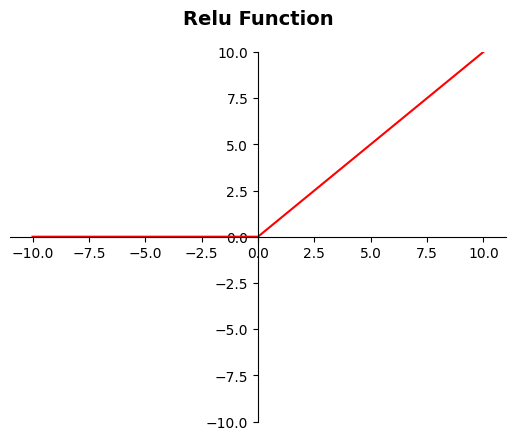

In [5]:
"""
Şimdi de dikkatimizi katmanlardaki aktivasyon fonksiyonlarına yöneltelim. Katmanlardaki aktivasyon fonksiyonları ne olmalıdır? 
Girdi katmanı gerçek bir katman olmadığına göre orada bir aktivasyon fonksiyonu yoktur. Saklı katmanlardaki aktivasyon 
fonksiyonları için çeşitli seçenekler bulunmaktadır. Biz de bu bölümde belli başlı aktivasyon fonksiyonlarını daha ayrıntılı 
olarak ele alacağız.

Özellikle son yıllarda saklı katmanlarda en fazla tercih edilen aktivasyon fonksiyonu "relu (rectified linear unit)" denilen 
aktivasyon fonksiyonudur. Bu fonksiyona İngilizce "rectifier" da denilmektedir.  Relu fonksiyonu şöyledir:

x >= 0  ise y = x
x < 0   ise y = 0

Yani relu fonksiyonu x değeri 0'dan büyük ise (ya da eşit ise) aynı değeri veren, x değeri 0'dan küçük ise 0 değerini veren 
fonksiyondur. relu fonksiyonunu basit bir biçimde aşağıdaki gibi yazabiliriz:

def relu(x):
  return np.maximum(x, 0)  

NumPy kütüphanesinin maximum fonksiyonunun birinci parametresi bir NumPy dizisi ya da Python listesi biçiminde girilirse
fonksiyon bu dizinin ya da listenin her elemanı ile maximum işlemi yapmaktadır. Örneğin:

>>> import numpy as np
>>> x = [10, -4, 5, 8, -2]
>>> y = np.maximum(x, 3)
>>> y
array([10,  3,  5,  8,  3])

Relu fonksiyonun grafiği aşağıdaki gibi çizilebilir. 

"""
import numpy as np
import matplotlib.pyplot as plt

def relu(x):
      return np.maximum(x, 0)  

x = np.linspace(-10, 10, 1000)
y = relu(x)

plt.title('Relu Function', fontsize=14, fontweight='bold', pad=20)
axis = plt.gca()
axis.spines['left'].set_position('center')
axis.spines['bottom'].set_position('center')
axis.spines['top'].set_color(None)
axis.spines['right'].set_color(None)
axis.set_ylim(-10, 10)
plt.plot(x, y, color='red')
plt.show()

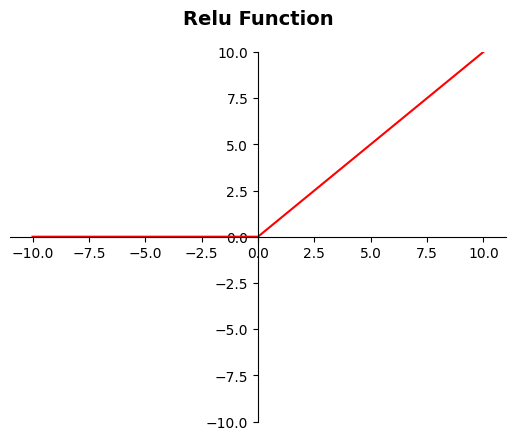

In [6]:
"""
Aktivasyon fonksiyonları katman nesnelerine isimsel olarak girilebileceği gibi tensorflow.keras.activations modülündeki 
fonksiyonlar biçiminde de girilebilmektedir. Örneğin:

from tensorflow.keras.activations import relu
...
model.add(Dense(16, activation=relu, name='Hidden'))

Bu modüldeki fonksiyonlar keras Tensorflow kullanılarak yazıldığı için çıktı olarak Tensor nesneleri vermektedir. Biz relu
grafik çizdirirken fonksiyonunu kendimiz yazmak yerine tensorflow içerisindeki fonksiyonu doğrudan da kullanabiliriz. Tensor
nesnelerinin NumPy dizilerine dönüştürülmesi için Tensor sınıfının numpy metodu kullanılabilir. Örneğin:

from tensorflow.keras.activations import relu

x = np.linspace(-10, 10, 1000)
y = relu(x).numpy()

Aşağıdakiş örnekte relu fonksiyonun grafiği Tensorflow'daki relu fonksiyonu yardımıyla çizdirilmiştir.
"""
import numpy as np
import matplotlib.pyplot as plt

def relu(x):
      return np.maximum(x, 0)  

x = np.linspace(-10, 10, 1000)

# y = relu(x)

from tensorflow.keras.activations import relu
y = relu(x).numpy()

plt.title('Relu Function', fontsize=14, fontweight='bold', pad=20)
axis = plt.gca()
axis.spines['left'].set_position('center')
axis.spines['bottom'].set_position('center')
axis.spines['top'].set_color(None)
axis.spines['right'].set_color(None)
axis.set_ylim(-10, 10)
plt.plot(x, y, color='red')
plt.show()


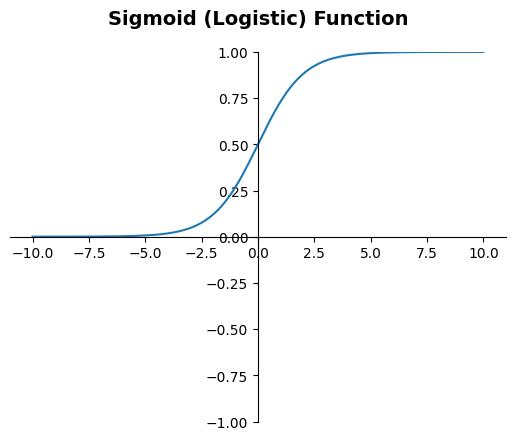

In [7]:
"""
İkili sınıflandırma problemlerinde çıktı katmanında en fazla kullanılan aktivasyon fonksiyonu "sigmoid" denilen fonksiyondur. 
Yukarıdaki "diabetes" örneğinde biz çıktı katmanında sigmoid fonksiyonunu kullanmıştık. Gerçekten de ikili sınıflandırma 
problemlerinde ağın çıktı katmanında tek bir nöron bulunur ve bu nörounun da aktivasyon fonksiyonu "sigmoid" olur. 

Pekiyi sigmoid nasıl bir fonksiyondur? Bu fonksiyona "lojistik (logistic)" fonksiyonu da denilmektedir. Fonksiyonun matematiksel 
ifadesi şöyledir:

y = 1 / (1 + e ** -x)

Burada e değeri 2.71828... biçiminde irrasyonel bir değerdir. Yukarıdaki kesrin pay ve paydası e ** x ile çarpılırsa fonksiyon 
aşağıdaki gibi de ifade edilebilir:

y = e ** x / (1 + e ** x)

Fonksiyona "sigmoid" isminin verilmesinin nedeni S şekline benzemesinden dolayıdır. Sigmoid eğrisi x = 0 için 0.5 değerini 
veren x pozitif yönde arttıkça 1 değerine hızla yaklaşan, x negatif yönde arttıkça 0 değerine hızla yaklaşan S şeklinde bir 
eğridir. Sigmoid fonksiyonunun (0, 1) arasında bir değer verdiğine dikkat ediniz. x değeri artıkça eğri 1'e yaklaşır ancak 
hiçbir zaman 1 olmaz. Benzer biçimde x değeri azaldıkça eğri 0'a yaklaşır ancak hiçbir zaman 0 olmaz. 

Sigmoid fonksiyonu makine öğrenmesinde ve istatistikte belli bir gerçek değeri 0 ile 1 arasına hapsetmek için sıkça 
kullanılmaktadır. Sigmoid çıktısı aslında bir bakımdan kestirimin 1 olma olasılığını vermektedir. Tabii biz kestirimde 
bulunurken kesin bir yargı belirteceğimiz için eğrinin orta noktası olan 0.5 değerini referans alırız. Ağın ürettiği değer 
0.5'ten büyükse bunu 1 gibi, 0.5'ten küçükse 0 gibi değerlendiririz.  

Sigmoid eğrisi aşağıdaki gibi çizilebilir.
"""
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 1000)
y = np.e ** x / (1 + np.e ** x)

plt.title('Sigmoid (Logistic) Function', fontsize=14, pad=20, fontweight='bold')
axis = plt.gca()
axis.spines['left'].set_position('center')
axis.spines['bottom'].set_position('center')
axis.spines['top'].set_color(None)
axis.spines['right'].set_color(None)

axis.set_ylim(-1, 1)

plt.plot(x, y)
plt.show()


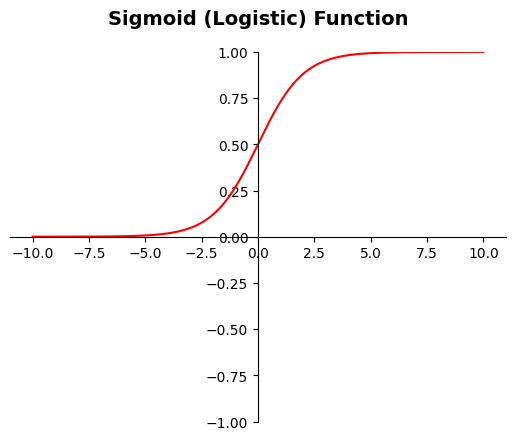

In [8]:
"""
Yine benzer biçimde tensorflow.keras.activations modülü içerisinde sigmoid fonksiyonu zaten hazır biçimde bulunmaktadır. 
Tabii bu fonksiyon da bize Tensorflow'daki bir Tensor nesnesini vermektedir. Aşağıda sigmoid eğrisini bu hazır fonksiyonu 
kullanarak çizdiriyoruz.
"""
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.activations import sigmoid

x = np.linspace(-10, 10, 1000)
y = sigmoid(x).numpy()

plt.title('Sigmoid (Logistic) Function', fontsize=14, fontweight='bold', pad=20)
axis = plt.gca()
axis.spines['left'].set_position('center')
axis.spines['bottom'].set_position('center')
axis.spines['top'].set_color(None)
axis.spines['right'].set_color(None)
axis.set_ylim(-1, 1)
plt.plot(x, y, color='red')
plt.show()

exp(x)/(exp(x) + 1) - exp(2*x)/(exp(x) + 1)**2


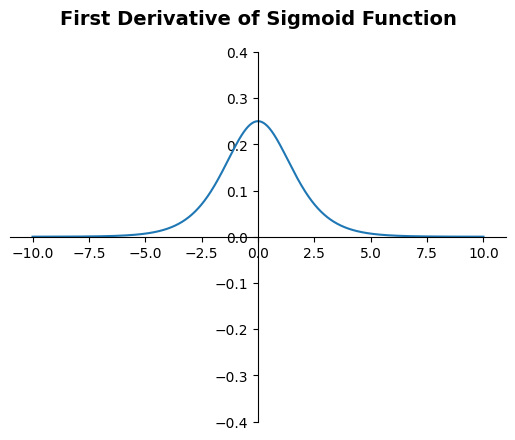

In [10]:
"""
Sigmoid fonksiyonu nasıl elde edilmiştir? Aslında bu fonksiyonun elde edilmesinin bazı mantıksal gerekçeleri vardır. 
Sigmoid fonksiyonunun birinci türevi Gauss eğrisine benzemektedir. Aşağıdaki örnekte Sigmoid fonksiyonunun birinci türevi 
alınıp eğrisi çizdirilmiştir. Ancak bu örnekte henüz görmediğimiz SymPy kütüphanesini kullandık. Sgmoid fonksiyonun birinci 
türevi şöyledir:

sigmoid'(x) = exp(x)/(exp(x) + 1) - exp(2 * x)/(exp(x) + 1) ** 2
""" 
import sympy
from sympy import init_printing

init_printing()

x = sympy.Symbol('x')
fx = sympy.E ** x / (1 + sympy.E ** x)
dx = sympy.diff(fx, x)

print(dx)

import numpy as np

np.linspace(-10, 10, 1000)
pdx = sympy.lambdify(x, dx)

x = np.linspace(-10, 10, 1000)
y = pdx(x)

import matplotlib.pyplot as plt

plt.title('First Derivative of Sigmoid Function', fontsize=14, pad=20, fontweight='bold')
axis = plt.gca()
axis.spines['left'].set_position('center')
axis.spines['bottom'].set_position('center')
axis.spines['top'].set_color(None)
axis.spines['right'].set_color(None)

axis.set_ylim(-0.4, 0.4)

plt.plot(x, y)
plt.show()

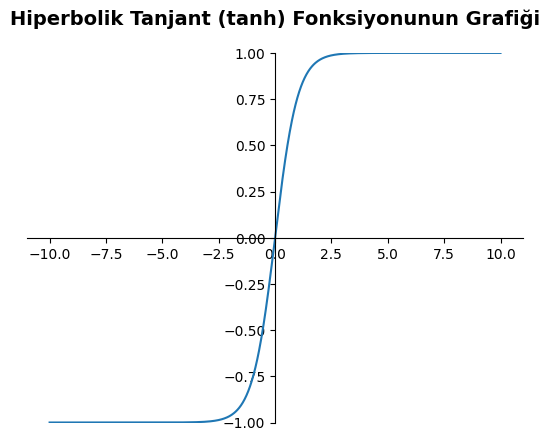

In [2]:
"""
Diğer çok kullanılan bir aktivasyon fonksiyonu da "hiperbolik tanjant" fonksiyonudur. Bu fonksiyona kısaca "tanh" fonksiyonu
da denilmektedir. Fonksiyonun matematiksel ifadesi şöyledir:

f(x) = (e ** (2 * x) - 1) / (e ** (2 * x) + 1)

Fonksiyonun sigmoid fonksiyonuna benzediğine ancak üstel ifadenin x yerine 2 * x olduğuna dikkat ediniz. Tanh fonksiyonu adeta 
sigmoid fonksiyonunun (-1, +1) arası değer veren biçimi gibidir. Fonksiyon yine S şekli biçimindedir. Ancak noktası x = 0'dadır.

Tanh fonksiyonu saklı katmanlarda da bazen çıktı katmanlarında da kullanılabilmektedir. Eskiden bu fonksiyon saklı katmanlara 
çok yoğun kullanılıyordu. Ancak artık saklı katmanlarda daha çok relu fonksiyonu tercih edilmektedir. Fakat tanh fonksiyonunun 
daha iyi sonuç verdiği modeller de söz konusu olmaktadır. 

tanh fonksiyonu Keras'ta tensorflow.keras.activations modülünde tanh ismiyle de bulunmaktadır.

Fonksiyonun grafiğini aşağıdaki gibi çizdirebiliriz. 
"""
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 1000)
y = (np.e ** (2 * x) - 1) / (np.e ** (2 * x) + 1)

plt.title('Hiperbolik Tanjant (tanh) Fonksiyonunun Grafiği', fontsize=14, pad=20, fontweight='bold')
axis = plt.gca()
axis.spines['left'].set_position('center')
axis.spines['bottom'].set_position('center')
axis.spines['top'].set_color(None)
axis.spines['right'].set_color(None)

axis.set_ylim(-1, 1)

plt.plot(x, y)
plt.show()

In [6]:
"""
Diğer çok karşılaşılan bir aktivasyon fonksiyonu da "softmax" isimli fonksiyondur. Softmax fonksiyonu çok sınıflı sınıflandırma 
problemlerinde çıktı katmanlarında kullanılmaktadır. Bu aktivasyon fonksiyonu Keras'ta "softmax" ismiyle bulunmaktadır. 
Örneğin bir resmin "elma", "armut", "kayısı", "şeftali", "karpuz" resimlerinden hangisi olduğunu anlamak için kullanılan 
sınıflandırma modeli çok sınıflı bir sınıflandırma modelidir. Buna istatistikte "çok sınıflı lojistik regresyon (multinomial 
logistic regression)" da denilmektedir. Bu tür problemlerde sinir ağında sınıf sayısı kadar nöron bulundurulur. Örneğin 
yukarıdaki "elma", "armut", "kayısı", "şeftali", "karpuz" resim sınıflandırma probleminde ağın çıktısında 5 nöron bulunacaktır. 

Ağın çıktı katmanındaki tüm nöronların aktivasyon fonksiyonları "softmax" yapılırsa tüm çıktı katmanındaki nöronların çıktı 
değerlerinin toplamı her zaman 1 olur. Böylece çıktı katmanındaki nöronların çıktı değerleri ilgili sınıfın olasılığını belirtir 
hale gelir. Biz de toplamı 1 olan çıktıların en yüksek değerine bakarız ve sınıflandırmanın o sınıfı kestirdiğini kabul ederiz. 
Örneğin yukarıdaki "elma", "armut", "kayısı", "şeftali", "karpuz" sınıflandırma probleminde ağın çıktı katmanındaki nöronların 
çıktı değerlerinin şöyle olduğunu varsayalım: 

Elma Nöronunun Çıktısı ---> 0.2
Armut Nöronunun Çıktısı ---> 0.2
Kayısı Nöronunun Çıktısı ---> 0.3
Şeftali Nöronunun Çıktısı ---> 0.2
karpuz Nöronunun Çıktısı ---> 0.1

Burada en büyük çıktı 0.3 olan kayısı nöronuna ilişkindir. O halde biz bu kestirimin "kayısı" olduğuna karar veririz. 
Softmax fonksiyonu bir grup değer için o grup değerlere bağlı olarak şöyle hesaplanmaktadır: 

softmax(x) = np.e ** x / np.sum(np.e ** x)

Burada gruptaki değerler x vektörüyle temsil edilmektedir.  Fonksiyonda değerlerinin e tabanına göre kuvvetleri x değerlerinin 
e tabanına göre kuvvetlerinin toplamına bölünmüştür. Bu işlemden yine gruptaki eleman sayısı kadar değer elde edilecektir. 
Tabii bu değerlerin toplamı da 1 olacaktır. Örneğin elimizde aşağıdaki gibi x değerleri olsun:

x = np.array([3, 6, 4, 1, 7])

Şimdi bu x değerlerinin softmax değerlerini elde edelim:  

>>> import numpy as np
>>> x = np.array([3, 6, 4, 1, 7])
>>> x
array([3, 6, 4, 1, 7])
>> sm = np.e ** x / np.sum(np.e ** x)
>>> sm
array([0.0127328 , 0.25574518, 0.03461135, 0.0017232 , 0.69518747])
>>> np.sum(sm)
1.0

softmax fonksiyonu Keras'ta tensorflow.keras.activations modülünde softmax ismiyle de bulunmaktadır. Ancak bu fonksiyonu 
kullanırken girdinin Tensorflow'daki bir Tensor nesnesi biçiminde ve iki boyutlu olarak verilmiş olması gerekmektedir. 
Tensorflow kütüphanesindeki aktivasyon fonksiyonları dışarıdan değil Tensorflow içerisinden kullanılsın diye tasarlanmıştır.
Bu nedenle softmax gibi bazı fonksiyonlarda biz NumPy dizisi verememekteyiz. Ayrıca Tensorflow'daki bu aktivasyon fonksiyonları
birden fazla değer üzerinde de bir Tensor olarak işlem yapabilmektedir. (softmax fonksiyonunda aslında bir değer bir grup 
değerden oluştuğu için girdi olarak da bizden iki boyutlu bir Tensor istenmektedir.) Örneğin:

>>> import numpy as np
>>> import tensorflow as tf
>>> from tensorflow.keras.activations import softmax
>>> x = np.array([[1, 2, 3, 4, 5]], dtype=np.float64)
>>> t = tf.convert_to_tensor(x)
>>> result = softmax(t)
>>> result
<tf.Tensor: shape=(1, 5), dtype=float64, numpy=array([[0.01165623, 0.03168492, 0.08612854, 0.23412166, 0.63640865]])>

Keras aslında çıktı katmanlarındaki tüm softmax aktivasyon fonksiyonlarının bir grup oluşturduğunu varsayar. Sonra girdilerle 
ağırlık değelerini çarpıp bias değeriyle toplayarak yukarıdaki gibi bir x vektörü elde eder. Sonra da yukarıdaki işlemi 
uygular. Başka bir deyişle çıktı katmanındaki softmax aktivasyon fonksiyonuna sahip olan nöronlar bir grup olarak 
değerlendirilmektedir. 
"""
import numpy as np
x = np.array([3, 6, 4, 1, 7])
print(x)
sm = np.e ** x / np.sum(np.e ** x)
print("****")
print(sm)
print(np.sum(sm))

##softmax ornegi 
import numpy as np
import tensorflow as tf
from tensorflow.keras.activations import softmax
x = np.array([[1, 2, 3, 4, 5]], dtype=np.float64)
t = tf.convert_to_tensor(x)
result = softmax(t)
print("***")
print(result)


[3 6 4 1 7]
****
[0.0127328  0.25574518 0.03461135 0.0017232  0.69518747]
1.0
***
tf.Tensor([[0.01165623 0.03168492 0.08612854 0.23412166 0.63640865]], shape=(1, 5), dtype=float64)


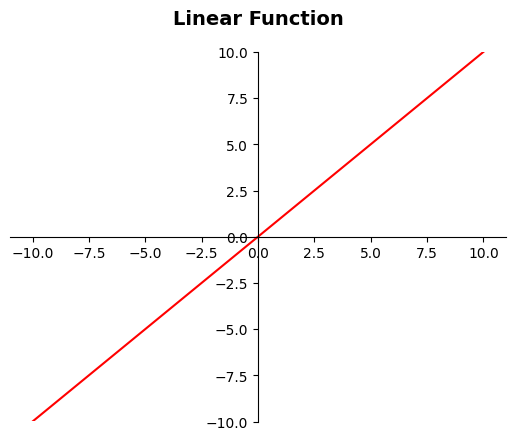

In [1]:
""" 
Diğer çok kullanılan aktivasyon fonksiyonlarından biri de "linear" aktivasyon fonksiyonudur. Aslında bu fonksiyon y = x 
ya da f(x) = x fonksiyonudur. Yani "linear" fonksiyonu girdi ile aynı değeri üretmektedir. Başka bir deyişle bir şey yapmayan 
bir fonksiyondur. Pekiyi böyle bir aktivasyon fonksiyonunun ne anlamı olabilir? Bu aktivasyon fonksiyonu "regresyon problemlerinde 
(lojistik olmayan regresyon problemlerinde)" çıktı katmanında kullanılmaktadır. Regresyon problemleri çıktı olarak bir sınıf 
bilgisi değil gerçek bir değer bulmaya çalışan problemlerdir. Örneğin bir evin fiyatının kestirilmesi, bir otomobilin mil 
başına yaktığı yakıt miktarının kestirilemsi gibi problemler lojistik  olmayan regresyon problemleridir. (Anımsanacağ gibi 
biz kursumuzda bir sayı kestirmek için kullanılan regresyon modellerine vurgulama amaçlı bazen "lojistik olmayan regresyon 
modelleri)" de diyoruz. Aslında "regresyon modeli" denildiğinde zaten default olarak lojistik olmayan regresyon modelleri 
anlaşılmaktadır.) 

linear aktivasyon fonksiyonu Keras'ta "linear" ismiyle kullanılmaktadır. Her ne kadar bir şey yapmıyorsa da bu aktivasyon 
fonksiyonu aynı zamanda tensorflow.keras.activations modülünde linear isimli bir fonksiyon biçiminde de bulunmaktadır. 
Örneğin:

>>> from tensorflow.keras.activations import linear
>>> x = [1, 2, 3, 4, 5]
>>> x = np.array([1, 2, 3, 4, 5], dtype=np.float64)
>>> result = linear(x)
>>> result
array([1., 2., 3., 4., 5.])

linear fonksiyonunun grafiğini -bariz olmasına karşın- aşağıda veriyoruz.
"""
import numpy as np
import matplotlib.pyplot as plt

def linear(x):
      return x

x = np.linspace(-10, 10, 1000)
y = linear(x)

"""
from tensorflow.keras.activations import linear

y = linear(x).numpy()
"""

plt.title('Linear Function', fontsize=14, fontweight='bold', pad=20)
axis = plt.gca()
axis.spines['left'].set_position('center')
axis.spines['bottom'].set_position('center')
axis.spines['top'].set_color(None)
axis.spines['right'].set_color(None)
axis.set_ylim(-10, 10)
plt.plot(x, y, color='red')
plt.show()